# TASK 03-Price Recommendation for Online Sellers

Description- E-commerce platforms today are extensively driven by machine learning algorithms, right from quality checking and inventory management to sales demographics and product recommendations, all use machine learning. One more interesting business use case that e-commerce apps and websites are trying to solve is to eliminate human interference in providing price suggestions to the sellers on their marketplace to speed up the efficiency of the shopping website or app. That's when price recommendation using machine learning comes to play.

Dataset link:https://www.kaggle.com/datasets/carrie1/ecommerce-data?resource=download

Price Recommendation for Online Sellers lets suppliers compare their prices with other vendors, prices for the same or similar products. In terms of sales growth, it displays the impact that accepting price recommendations has had at both the product and the overall level.

They can filter products based on item category and/or sales numbers (“Top Selling”, “Low Selling” or “Non Selling”). To help them make an informed decision, we also display the transfer price, i.e., the amount that they will receive after accounting for logistics.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('D:/Codeclause/data.csv',encoding = 'ISO-8859-1')

In [3]:
df1=df

In [4]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Statistical Summary

In [6]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df1.describe(include=object)

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [8]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Data Pre-Processing

#### Missing Value Treatment

In [9]:
df1 = df1.loc[df1['Quantity'] > 0]
df1 = df1.loc[df1['UnitPrice'] > 0]

In [10]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [11]:
df1.loc[df['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom


In [12]:
df1.nunique()

InvoiceNo      19960
StockCode       3922
Description     4026
Quantity         375
InvoiceDate    18499
UnitPrice       1291
CustomerID      4338
Country           38
dtype: int64

In [13]:
df1.shape

(530104, 8)

In [14]:
df1 = df1.dropna(subset=['CustomerID'])

In [15]:
df1.shape

(397884, 8)

In [16]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df1.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.004563,-0.006232
UnitPrice,-0.004563,1.000000,-0.010873
CustomerID,-0.006232,-0.010873,1.000000


#### Visualization

<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

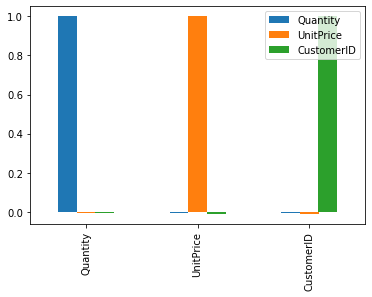

In [18]:
plt.figure(figsize=(20,10))
df1.corr().plot(kind='bar')

## Collabarative Filtering

Collaborative Filtering (CF) is a popular technique in recommendation systems, which is used to predict the preferences of a user by leveraging the preferences of other users. The idea behind CF is that if two users have similar preferences for certain items, then it is likely that they will have similar preferences for other items as well.

CF algorithms generally fall into two categories: user-based and item-based. In user-based CF, the algorithm identifies users who have similar preferences to a given user and recommends items that those similar users have liked. In item-based CF, the algorithm identifies items that are similar to items that a user has liked in the past and recommends those similar items.

Collaborative Filtering is widely used in various industries such as e-commerce, media and entertainment, and social media, where it is used to recommend products, movies, music, and friends, respectively. It is a powerful technique for making personalized recommendations to users, as it can leverage the preferences of other users to make accurate predictions for a given user.

This model is used to forecast the ratings for things or items themselves that the user could be interested in.

In [19]:
customer_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity',aggfunc='sum')
customer_item_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [20]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
customer_item_matrix.shape

(4372, 3684)

### (A) Creating User-to-User Similarity Matrix

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))


In [27]:
user_user_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4368,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
4369,0.0,0.113776,0.000000,0.067574,0.000000,0.037905,0.0,0.000000,0.160128,0.079305,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000
4370,0.0,0.109364,0.170905,0.137124,0.044866,0.072870,0.0,0.113354,0.034204,0.093170,...,0.0,0.0,0.017102,0.043602,0.000000,0.000000,0.046613,0.017800,1.000000,0.096334


In [28]:
user_user_sim_matrix.shape

(4372, 4372)

In [29]:
user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix['CustomerID'] = customer_item_matrix.index

user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [30]:
user_user_sim_matrix.loc[12557].sort_values(ascending=False)

CustomerID
12557.0    1.000000
15970.0    0.544949
17083.0    0.527046
12939.0    0.507093
12732.0    0.447214
             ...   
14640.0    0.000000
14641.0    0.000000
14642.0    0.000000
14643.0    0.000000
18287.0    0.000000
Name: 12557.0, Length: 4372, dtype: float64

In [31]:
items_bought_by_12557 = set(customer_item_matrix.loc[12557].iloc[customer_item_matrix.loc[12557].to_numpy().nonzero()].index)
items_bought_by_12557

{'20725',
 '20727',
 '20728',
 '21238',
 '21239',
 '21240',
 '21242',
 '21243',
 '21244',
 '22383',
 '22384',
 '84997A',
 '84997B',
 '84997C',
 '84997D'}

In [32]:
items_bought_by_12431 = set(customer_item_matrix.loc[12431.0].iloc[customer_item_matrix.loc[12431.0].to_numpy().nonzero()].index)
items_bought_by_12431

{'15056BL',
 '16169E',
 '20675',
 '20677',
 '20685',
 '20712',
 '20719',
 '20724',
 '20725',
 '20726',
 '21000',
 '21001',
 '21080',
 '21094',
 '21115',
 '21164',
 '21217',
 '21239',
 '21240',
 '21242',
 '21243',
 '21244',
 '21245',
 '21428',
 '21481',
 '21507',
 '21524',
 '21527',
 '21533',
 '21537',
 '21555',
 '21622',
 '21706',
 '21707',
 '21731',
 '21745',
 '21770',
 '21791',
 '21880',
 '21883',
 '21931',
 '21933',
 '21935',
 '21936',
 '21937',
 '22027',
 '22029',
 '22037',
 '22045',
 '22090',
 '22131',
 '22138',
 '22191',
 '22192',
 '22193',
 '22194',
 '22195',
 '22196',
 '22204',
 '22219',
 '22326',
 '22328',
 '22329',
 '22352',
 '22354',
 '22356',
 '22382',
 '22383',
 '22385',
 '22411',
 '22413',
 '22423',
 '22466',
 '22467',
 '22492',
 '22505',
 '22617',
 '22629',
 '22631',
 '22690',
 '22692',
 '22697',
 '22698',
 '22699',
 '22712',
 '22726',
 '22727',
 '22728',
 '22729',
 '22730',
 '22785',
 '22786',
 '22835',
 '22846',
 '22907',
 '22941',
 '22951',
 '22965',
 '22966',
 '22971

In [33]:
items_to_recommend_to_12557 = items_bought_by_12557 - items_bought_by_12431
items_to_recommend_to_12557

{'20727', '20728', '21238', '22384', '84997A', '84997B', '84997C', '84997D'}

In [34]:
df1.loc[df['StockCode'].isin(items_to_recommend_to_12557), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

,Description
StockCode,
84997B,RED 3 PIECE RETROSPOT CUTLERY SET
84997C,BLUE 3 PIECE POLKADOT CUTLERY SET
22384,LUNCH BAG PINK POLKADOT
20728,LUNCH BAG CARS BLUE
20727,LUNCH BAG BLACK SKULL.
84997D,PINK 3 PIECE POLKADOT CUTLERY SET
84997A,GREEN 3 PIECE POLKADOT CUTLERY SET
21238,RED RETROSPOT CUP
84997C,CHILDRENS CUTLERY POLKADOT BLUE


In [35]:
most_similar_user = user_user_sim_matrix.loc[12557].sort_values(ascending=False).reset_index().iloc[1, 0]
most_similar_user

15970.0

In [36]:
def get_items_to_recommend_cust(cust_a): 
  most_similar_user = user_user_sim_matrix.loc[cust_a].sort_values(ascending=False).reset_index().iloc[1, 0]
  items_bought_by_cust_a = set(customer_item_matrix.loc[cust_a].iloc[customer_item_matrix.loc[cust_a].to_numpy().nonzero()].index)
  items_bought_by_cust_b = set(customer_item_matrix.loc[most_similar_user].iloc[customer_item_matrix.loc[most_similar_user].to_numpy().nonzero()].index)
  items_to_recommend_to_a = items_bought_by_cust_b - items_bought_by_cust_a
  items_description = df.loc[df['StockCode'].isin(items_to_recommend_to_a), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')
  return items_description

In [37]:
get_items_to_recommend_cust(12557.0)

,Description
StockCode,
22662,LUNCH BAG DOLLY GIRL DESIGN
22382,LUNCH BAG SPACEBOY DESIGN
22551,PLASTERS IN TIN SPACEBOY
85032C,CURIOUS IMAGES GIFT WRAP SET


In [38]:
get_items_to_recommend_cust(12431.0)

,Description
StockCode,
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
22749,FELTCRAFT PRINCESS CHARLOTTE DOLL
22960,JAM MAKING SET WITH JARS
22913,RED COAT RACK PARIS FASHION
22914,BLUE COAT RACK PARIS FASHION
...,...
22848,AMAZON
20711,lost in space
22925,AMAZON


## (B) Creating Item to Item similarity matrix

Creating an Item to Item similarity matrix involves computing the similarity between items in a dataset. The similarity between items can be computed using various similarity measures such as cosine similarity, Euclidean distance, Pearson correlation, and Jaccard similarity, among others.

In [39]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
item_item_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,3674,3675,3676,3677,3678,3679,3680,3681,3682,3683
0,1.000000,0.0,0.094868,0.091287,0.0,0.000000,0.090351,0.063246,0.098907,0.095346,...,0.0,0.0,0.0,0.029361,0.0,0.0,0.0,0.059423,0.0,0.070057
1,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.032774,0.045883,0.047836,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.017244,0.0,0.000000
2,0.094868,0.0,1.000000,0.115470,0.0,0.000000,0.057143,0.060000,0.041703,0.060302,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075165,0.0,0.000000
3,0.091287,0.0,0.115470,1.000000,0.0,0.000000,0.164957,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,1.0,0.447214,0.063888,0.044721,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


In [40]:
item_item_sim_matrix.shape

(3684, 3684)

In [41]:
item_item_sim_matrix.columns = customer_item_matrix.T.index
item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')
item_item_sim_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.0,0.094868,0.091287,0.0,0.000000,0.090351,0.063246,0.098907,0.095346,...,0.0,0.0,0.0,0.029361,0.0,0.0,0.0,0.059423,0.0,0.070057
10080,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.032774,0.045883,0.047836,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.017244,0.0,0.000000
10120,0.094868,0.0,1.000000,0.115470,0.0,0.000000,0.057143,0.060000,0.041703,0.060302,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075165,0.0,0.000000
10123C,0.091287,0.0,0.115470,1.000000,0.0,0.000000,0.164957,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
10124A,0.000000,0.0,0.000000,0.000000,1.0,0.447214,0.063888,0.044721,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


In [42]:
item_item_sim_matrix.loc['10002'].sort_values(ascending=False)

StockCode
10002     1.000000
90103     0.223607
21826     0.197642
16010     0.182574
90101     0.182574
            ...   
84247L    0.000000
21002     0.000000
21836     0.000000
84251B    0.000000
17038     0.000000
Name: 10002, Length: 3684, dtype: float64

In [43]:
top_10_similar_items = list(item_item_sim_matrix.loc['10002'].sort_values(ascending=False).iloc[:10].index)
top_10_similar_items

['10002',
 '90103',
 '21826',
 '16010',
 '90101',
 '84535A',
 '21439',
 '21086',
 '22243',
 '22972']

In [44]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [45]:
df1.loc[df['StockCode'] == '90210A']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28848,538661,90210A,GREY ACRYLIC FACETED BANGLE,12,12/13/2010 15:42,1.25,15194.0,United Kingdom
28887,538662,90210A,GREY ACRYLIC FACETED BANGLE,12,12/13/2010 15:44,1.25,15159.0,United Kingdom
56707,541110,90210A,GREY ACRYLIC FACETED BANGLE,2,1/13/2011 15:11,2.95,15916.0,United Kingdom


In [46]:
df1.loc[df['StockCode'] == '90210A'][:1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28848,538661,90210A,GREY ACRYLIC FACETED BANGLE,12,12/13/2010 15:42,1.25,15194.0,United Kingdom


In [47]:
df1.loc[df['StockCode'].isin(top_10_similar_items), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

,Description
StockCode,
10002,INFLATABLE POLITICAL GLOBE
90103,PURPLE FRANGIPANI NECKLACE
21826,EIGHT PIECE DINOSAUR SET
16010,FOLDING CAMPING SCISSOR W/KNIF & S
90101,WHITE FRANGIPANI NECKLACE
84535A,ENGLISH ROSE NOTEBOOK A6 SIZE
21439,BASKET OF TOADSTOOLS
21086,SET/6 RED SPOTTY PAPER CUPS
22243,5 HOOK HANGER RED MAGIC TOADSTOOL


In [48]:
def get_top_similar_items(item):
    top_10_similar_items = list(item_item_sim_matrix.loc[item].sort_values(ascending=False).iloc[:10].index)
    top_10 = df.loc[df['StockCode'].isin(top_10_similar_items), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]
    return top_10

This function is used to find and return the top 10 similar items to a given item based on a precomputed item-item similarity matrix.

In [49]:
get_top_similar_items('84029E')

,Description
StockCode,
84029E,RED WOOLLY HOTTIE WHITE HEART.
84029E,NaN
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
84029G,NaN
21479,WHITE SKULL HOT WATER BOTTLE
21479,?
21485,RETROSPOT HEART HOT WATER BOTTLE
22111,SCOTTIE DOG HOT WATER BOTTLE
22112,CHOCOLATE HOT WATER BOTTLE


# Thank You !!